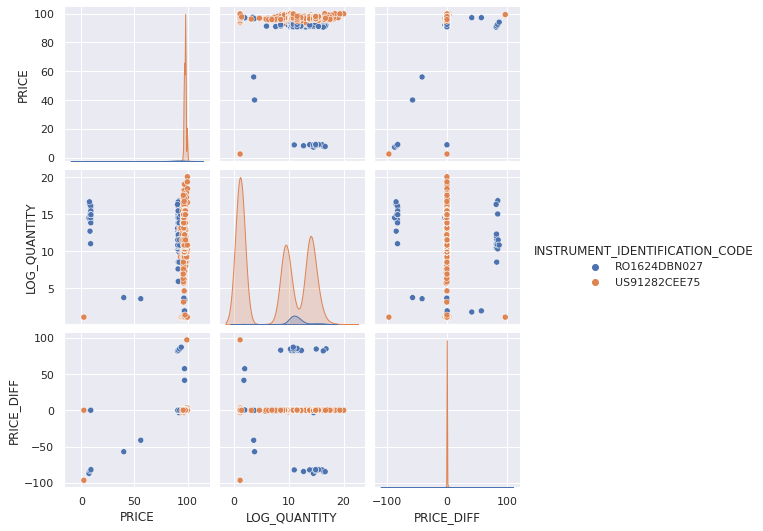

In [2]:
## Find the relationship between data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
df = pd.read_csv('liquidbonds_ae.csv')
#df=df.sample(2)
df=df.loc[df['INSTRUMENT_IDENTIFICATION_CODE'].isin(['US91282CEE75','RO1624DBN027'])]  #US91282CEE75,RO1624DBN027
#df = df[df['INSTRUMENT_IDENTIFICATION_CODE'] == 'GB0004893086','GB00BMGR2809']
df=df[['PRICE','LOG_QUANTITY','PRICE_DIFF','INSTRUMENT_IDENTIFICATION_CODE']]
sns.pairplot(df,hue='INSTRUMENT_IDENTIFICATION_CODE')
plt.show()


In [2]:
##Create the following transformations for quantity in all the datasets - log  and create the price difference for price

In [3]:

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import datetime
# import plotnine as p9
# import matplotlib.dates as mdates
# # Import data
# df1 = pd.read_csv('autoencoders_results.csv')
# df1['LOG_QUANTITY'] = np.log(df1['QUANTITY']+3)
# df1['LOG_QUANTITY']= np.log(df1['LOG_QUANTITY']).replace([np.inf, -np.inf], 0)
# df1['PRICE_DIFF'] = df1['PRICE'] - df1['PRICE'].shift(1)
# df1.drop(['is_anomaly'], axis=1, inplace=True)
# df1.drop(['mean_squared_error'], axis=1, inplace=True)
# df1.drop(['Anomaly_Type'], axis=1, inplace=True)
# df1.to_csv('autoencoders_results_t.csv', index=False)

# df2 = pd.read_csv('arima_plus_training_results.csv')
# df2['LOG_QUANTITY'] = np.log(df2['QUANTITY']+3)
# df1['LOG_QUANTITY']= np.log(df1['LOG_QUANTITY']).replace([np.inf, -np.inf], 0)
# df2['PRICE_DIFF'] = df2['PRICE'] - df2['PRICE'].shift(1)
# df2.drop(['is_anomaly'], axis=1, inplace=True)
# df2.drop(['normalized_distance'], axis=1, inplace=True)
# df2.drop(['CENTROID_ID'], axis=1, inplace=True)
# df2.to_csv('arima_plus_training_results_t.csv', index=False)

# df3 = pd.read_csv('kmeans_results.csv')
# df3['LOG_QUANTITY'] = np.log(df3['QUANTITY']+3)
# df1['LOG_QUANTITY']= np.log(df1['LOG_QUANTITY']).replace([np.inf, -np.inf], 0)
# df3['PRICE_DIFF'] = df3['PRICE'] - df3['PRICE'].shift(1)
# df3.drop(['is_anomaly'], axis=1, inplace=True)
# df3.drop(['normalized_distance'], axis=1, inplace=True)
# df3.drop(['CENTROID_ID'], axis=1, inplace=True)
# df3.to_csv('kmeans_results_t.csv', index=False)

# df4 = pd.read_csv('arima_plus_training_results_qty.csv')
# df4['LOG_QUANTITY'] = np.log(df4['QUANTITY']+3)
# df1['LOG_QUANTITY']= np.log(df1['LOG_QUANTITY']).replace([np.inf, -np.inf], 0)
# df4['PRICE_DIFF'] = df4['PRICE'] - df4['PRICE'].shift(1)
# df4.drop(['is_anomaly'], axis=1, inplace=True)
# df4.drop(['Anomaly_Type'], axis=1, inplace=True)
# df4.to_csv('arima_plus_training_results_qty_t.csv', index=False)


In [ ]:
## Auto Encoder Data   1st Bond selected RO1624DBN027

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotnine as p9
import matplotlib.dates as mdates

# Import data
df = pd.read_csv('egbbonds_ae.csv')
ax=sns.countplot(df['is_anomaly'])

#df = df[(df['POST_TRADE_DATE_AND_TIME'] >= '2022-01-01') & (df['POST_TRADE_DATE_AND_TIME'] <= '2022-02-28')]



ax.bar_label(ax.containers[0])
#df['Anomaly_Type'] = df['Anomaly_Type'].fillna('Not')

In [5]:
# Visualize the autoencoders data with no segment for one bond

df = df[df['INSTRUMENT_IDENTIFICATION_CODE'] == 'RO1624DBN027']
df['date'] = pd.to_datetime(df['POST_TRADE_DATE_AND_TIME'])
df = df.sort_values(by='POST_TRADE_DATE_AND_TIME')

df1=df[df['is_anomaly'] ==True]
df1['date'] = pd.to_datetime(df1['POST_TRADE_DATE_AND_TIME'])
df1 = df1.sort_values(by='POST_TRADE_DATE_AND_TIME')

#df1
#print(df.tail())

/tmp/ipykernel_226/2075825047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


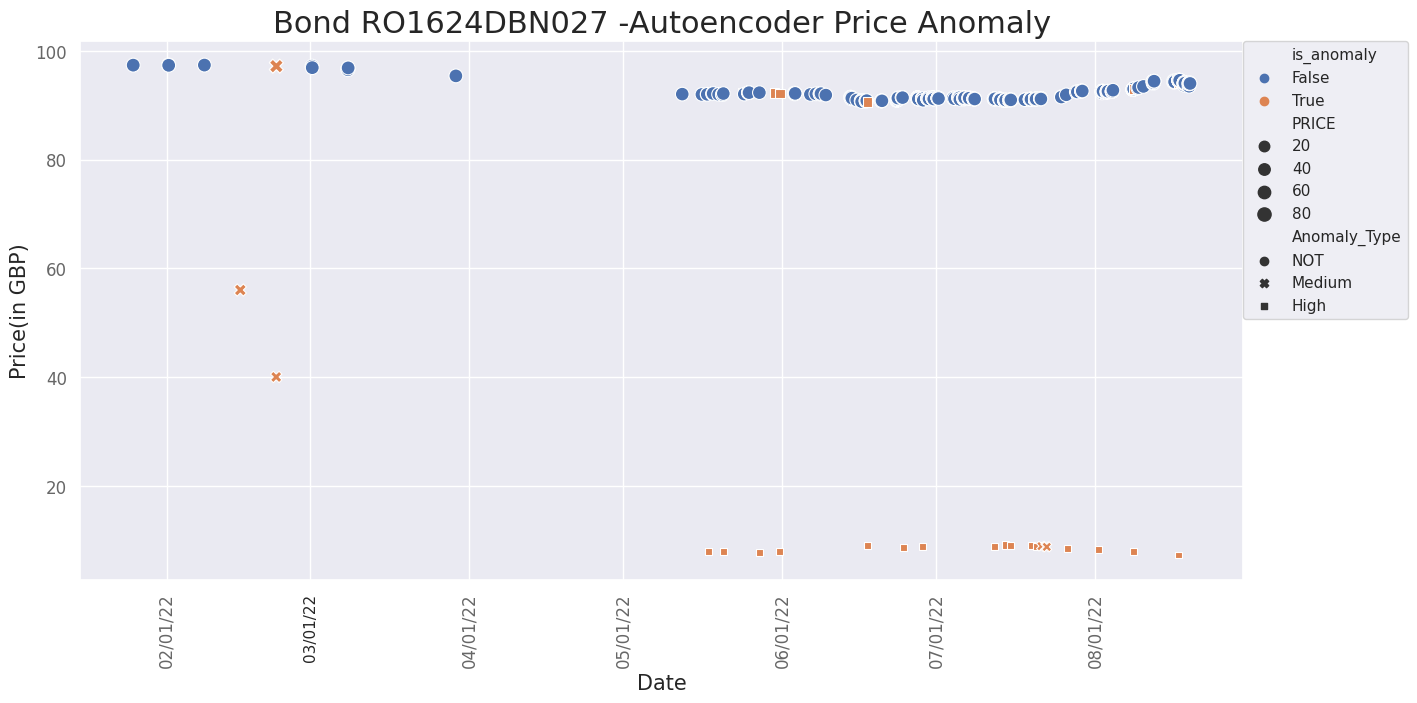

In [6]:
fig, ax = plt.subplots(figsize=(15,7))
#ax.plot(df['date'], df['PRICE'])
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price(in GBP)', fontsize=15)
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(fontsize=12, alpha=.7)
sns.set(style="darkgrid")
#g = sns.relplot(x="date", y="PRICE", kind="line", data=df4
sns.scatterplot(x='date', y='PRICE', data=df, hue='is_anomaly',size='PRICE',style='Anomaly_Type',legend='brief',sizes=(50, 100))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
#p9.ggplot(df, p9.aes(x='date', y='PRICE', color='is_anomaly')) + p9.geom_point(size=0.5)
plt.title('Bond RO1624DBN027 -Autoencoder Price Anomaly',fontsize=22)

plt.show()

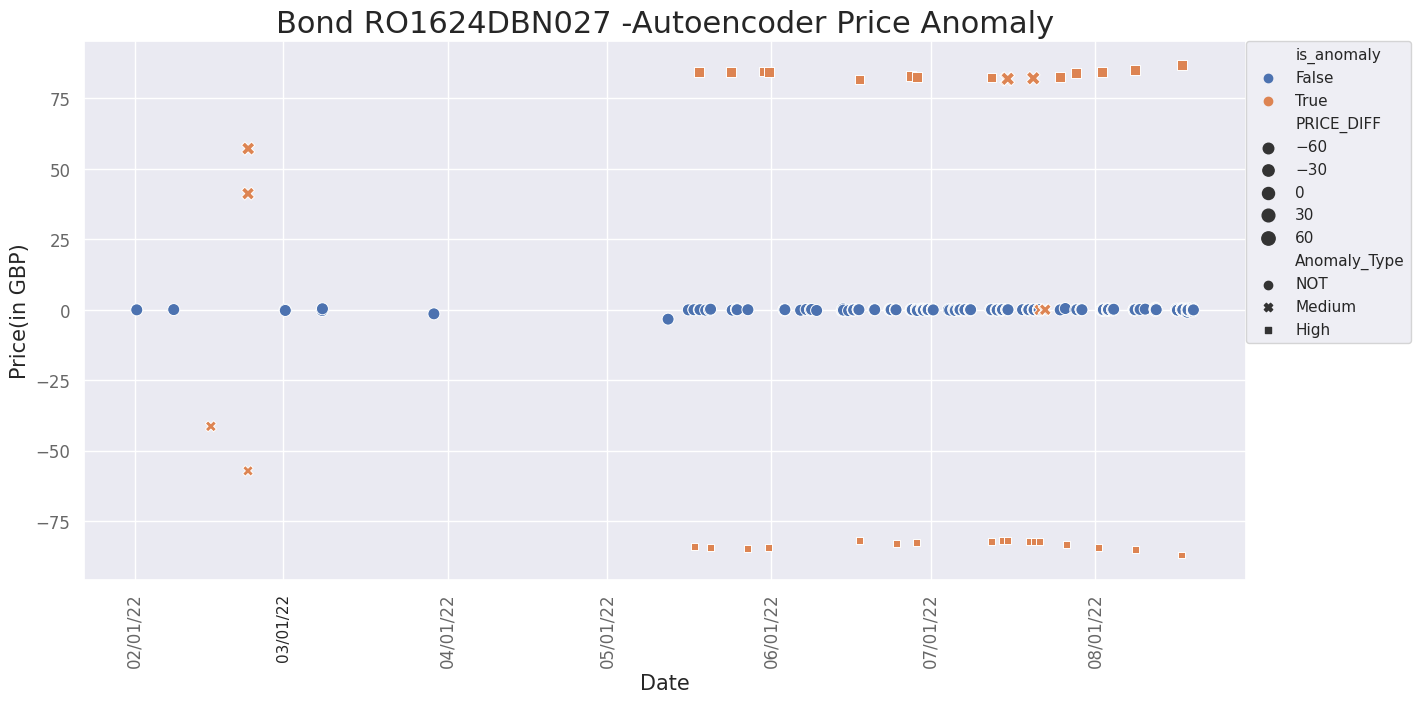

In [7]:
fig, ax = plt.subplots(figsize=(15,7))
#ax.plot(df['date'], df['PRICE'])
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price(in GBP)', fontsize=15)
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(fontsize=12, alpha=.7)
sns.set(style="darkgrid")
#g = sns.relplot(x="date", y="PRICE", kind="line", data=df4
sns.scatterplot(x='date', y='PRICE_DIFF', data=df, hue='is_anomaly',size='PRICE_DIFF',style='Anomaly_Type',legend='brief',sizes=(50, 100))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
#p9.ggplot(df, p9.aes(x='date', y='PRICE', color='is_anomaly')) + p9.geom_point(size=0.5)
plt.title('Bond RO1624DBN027 -Autoencoder Price Anomaly',fontsize=22)

plt.show()

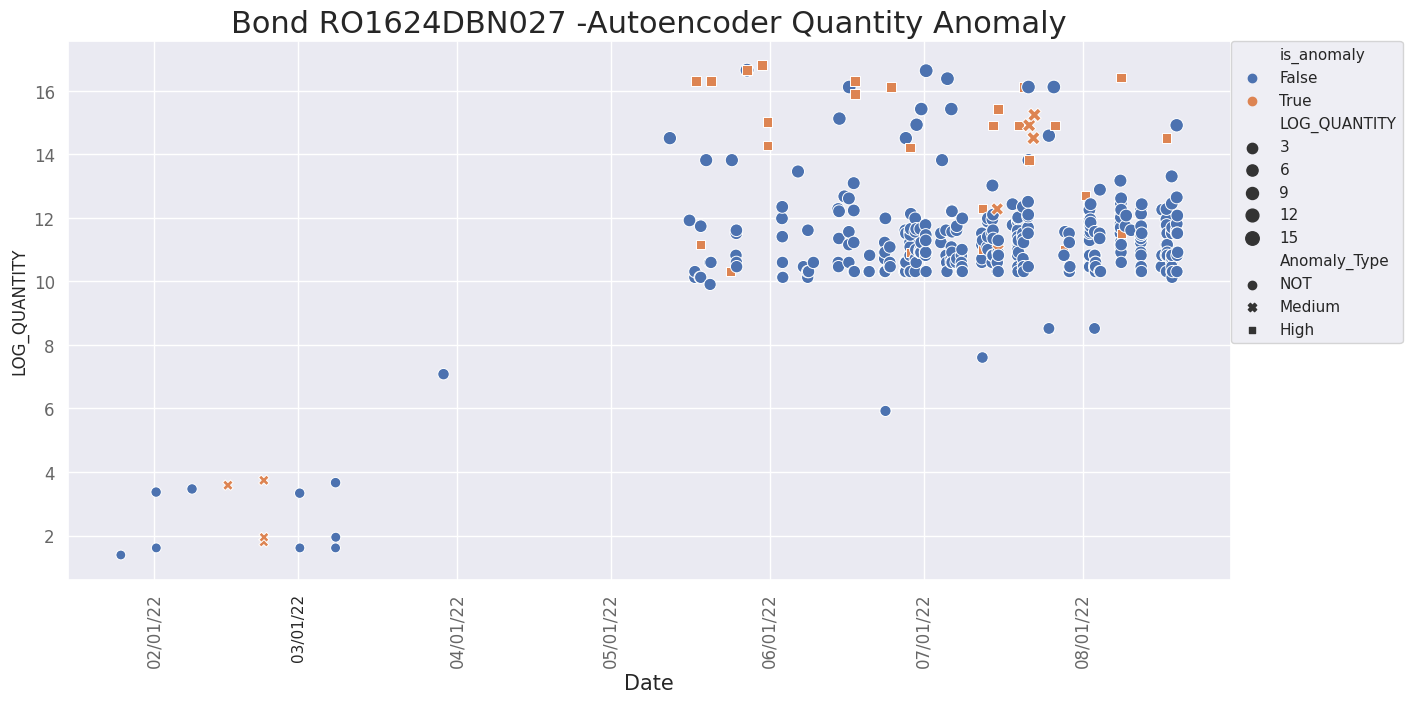

In [8]:
fig, ax = plt.subplots(figsize=(15,7))
#ax.plot(df['date'], df['PRICE'])
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date', fontsize=15)
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(fontsize=12, alpha=.7)
#sns.set(style="whitegrid")
plt.title('Bond RO1624DBN027 -Autoencoder Quantity Anomaly',fontsize=22)
sns.set(style="darkgrid")
sns.scatterplot(x='date', y='LOG_QUANTITY', data=df, hue='is_anomaly',size='LOG_QUANTITY',style='Anomaly_Type',legend='brief',sizes=(50, 100))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()


<AxesSubplot:>

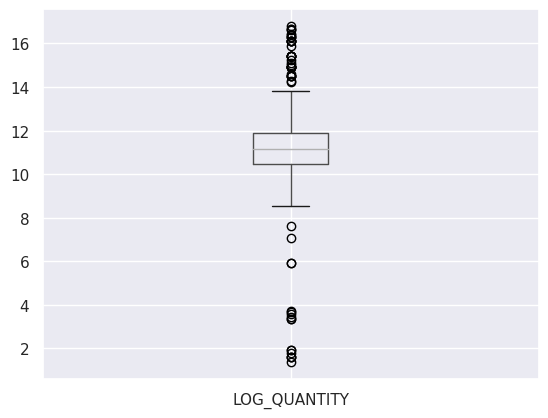

In [9]:
#sns.distplot(df['QUANTITY'])
plt.ticklabel_format(style='plain', axis='y')
df.boxplot(column='LOG_QUANTITY')

<AxesSubplot:>

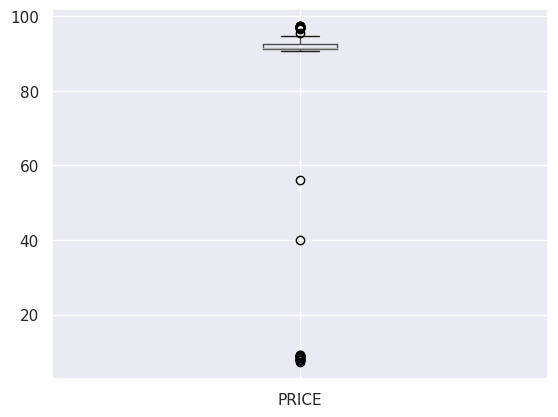

In [10]:
#sns.distplot(df['QUANTITY'])
plt.ticklabel_format(style='plain', axis='y')
df.boxplot(column='PRICE')

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Text(0.5, 0, 'Log Quantity (Distribution for Bond RO1624DBN027) ')

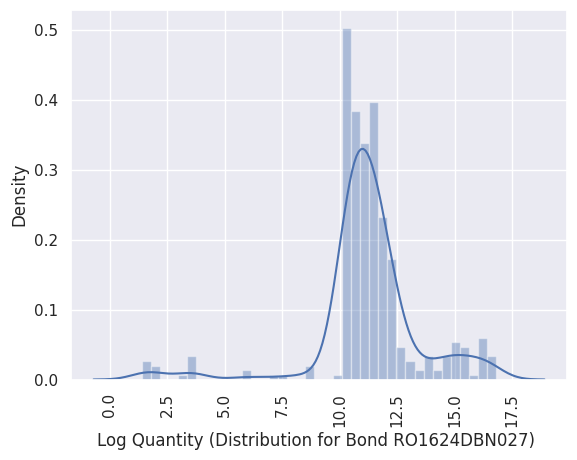

In [11]:
##Visualization of the quantity distribution
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=90)
sns.distplot(df['LOG_QUANTITY'])
plt.xlabel('Log Quantity (Distribution for Bond RO1624DBN027) ', fontsize=12)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Text(0.5, 0, ' Quantity (Distribution for Bond RO1624DBN027) ')

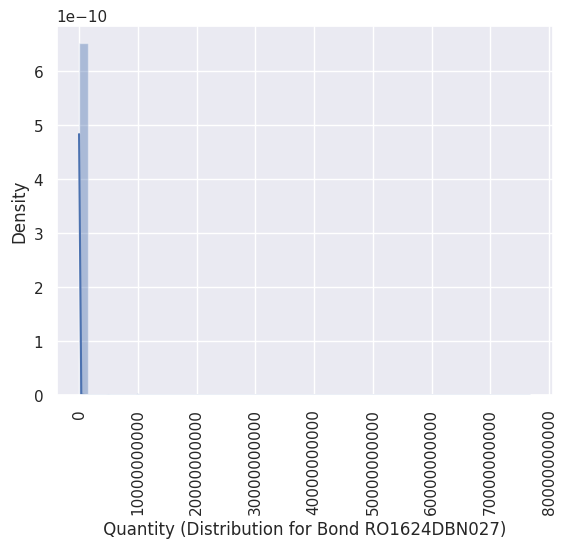

In [42]:
##Visualization of the quantity distribution
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=90)
sns.distplot(df['QUANTITY'])
plt.xlabel(' Quantity (Distribution for Bond RO1624DBN027) ', fontsize=12)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Text(0.5, 0, 'PRICE Difference (Distribution for Bond RO1624DBN027) ')

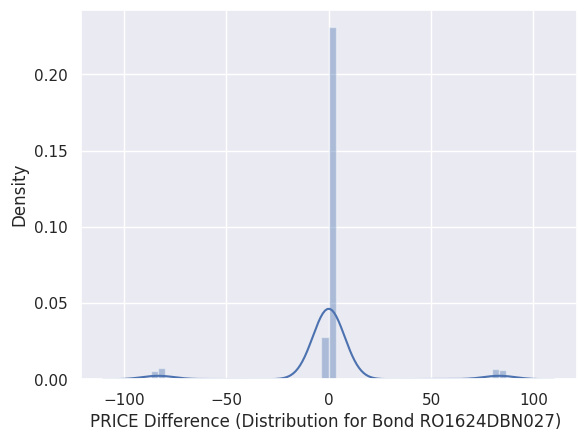

In [13]:
sns.distplot(df['PRICE_DIFF'])
plt.xlabel('PRICE Difference (Distribution for Bond RO1624DBN027) ', fontsize=12)

In [14]:
## 2nd Bond Selected ## Auto Encoder Data   Bond selected US91282CEE75

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.dates as mdates

# Import data
df = pd.read_csv('liquidbonds_ae.csv')
#df = df[(df['POST_TRADE_DATE_AND_TIME'] >= '2022-02-01') & (df['POST_TRADE_DATE_AND_TIME'] <= '2022-03-31')]
df['Anomaly_Type'] = df['Anomaly_Type'].fillna('Not')

In [15]:
# Visualize the data with  for one bond

df = df[df['INSTRUMENT_IDENTIFICATION_CODE'] == 'US91282CEE75'] ##GB0008932666  GB00B00NY175
df['date'] = pd.to_datetime(df['POST_TRADE_DATE_AND_TIME'])
df = df.sort_values(by='POST_TRADE_DATE_AND_TIME')

df1=df[df['is_anomaly'] ==True]
df1['date'] = pd.to_datetime(df1['POST_TRADE_DATE_AND_TIME'])
df1 = df1.sort_values(by='POST_TRADE_DATE_AND_TIME')


/tmp/ipykernel_226/816598341.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


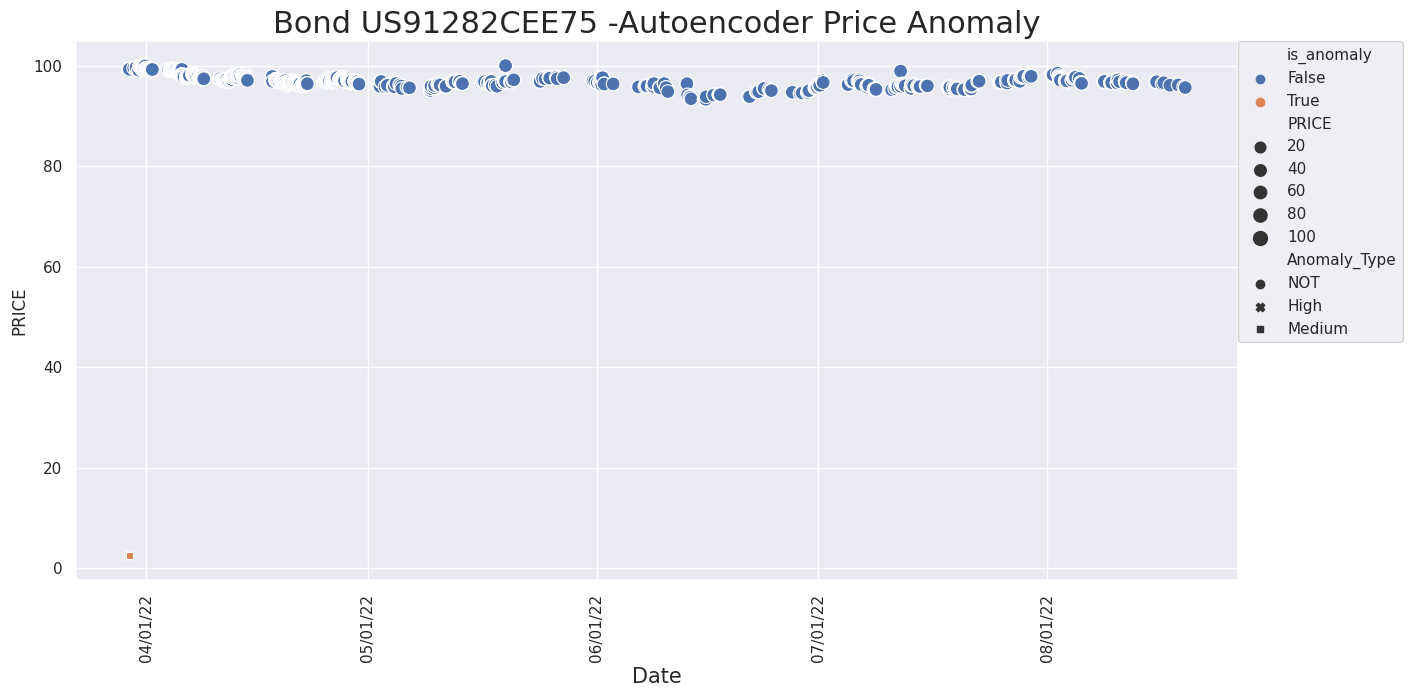

In [16]:
fig, ax = plt.subplots(figsize=(15,7))
#ax.plot(df['date'], df['PRICE'])
plt.xlabel('Date', fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.title('Bond US91282CEE75 -Autoencoder Price Anomaly',fontsize=22)
sns.scatterplot(x='date', y='PRICE', data=df, hue='is_anomaly',size='PRICE',style='Anomaly_Type',legend='brief',sizes=(50, 100))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
#p9.ggplot(df, p9.aes(x='date', y='QUANTITY', color='is_anomaly')) + p9.geom_point(size=0.5)

plt.show()

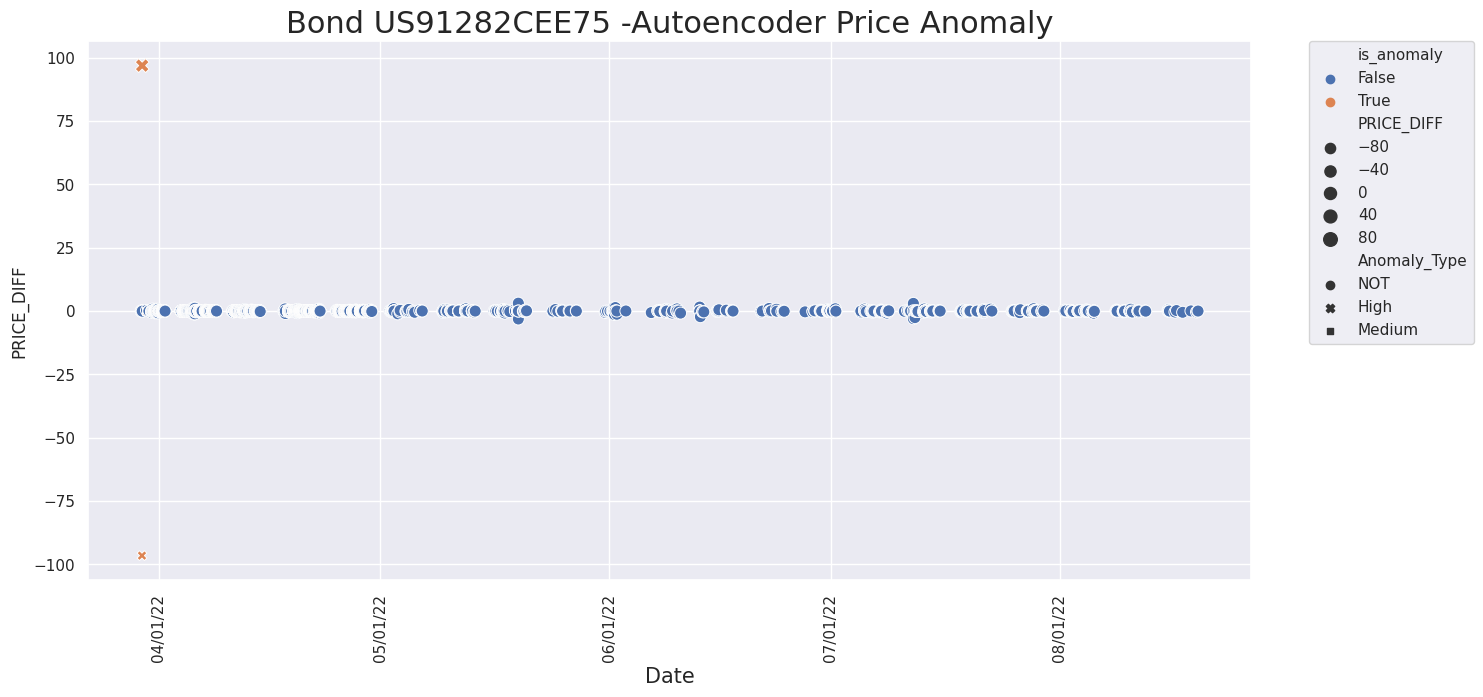

In [17]:
fig, ax = plt.subplots(figsize=(15,7))
#ax.plot(df['date'], df['PRICE'])
plt.xlabel('Date', fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.title('Bond US91282CEE75 -Autoencoder Price Anomaly',fontsize=22)
sns.scatterplot(x='date', y='PRICE_DIFF', data=df, hue='is_anomaly',size='PRICE_DIFF',style='Anomaly_Type',legend='brief',sizes=(50, 100))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#p9.ggplot(df, p9.aes(x='date', y='QUANTITY', color='is_anomaly')) + p9.geom_point(size=0.5)

plt.show()

<AxesSubplot:>

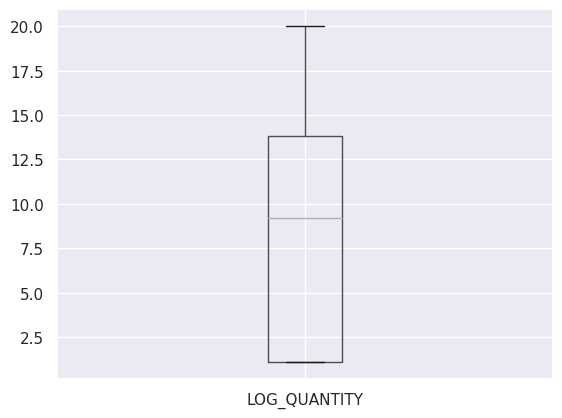

In [18]:
#sns.distplot(df['QUANTITY'])
plt.ticklabel_format(style='plain', axis='y')
df.boxplot(column='LOG_QUANTITY')

<AxesSubplot:>

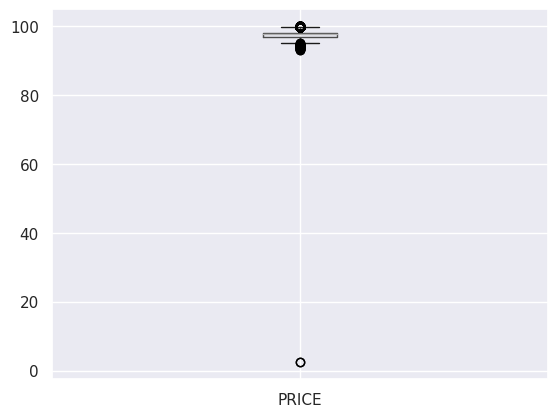

In [19]:
#sns.distplot(df['QUANTITY'])
plt.ticklabel_format(style='plain', axis='y')
df.boxplot(column='PRICE')

In [20]:
## 2nd Bond Selected ## Auto Encoder Data   Bond selected US91282CEE75

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.dates as mdates

# Import data
df = pd.read_csv('liquidbonds_ae.csv')
#df = df[(df['POST_TRADE_DATE_AND_TIME'] >= '2022-02-01') & (df['POST_TRADE_DATE_AND_TIME'] <= '2022-03-31')]


In [21]:
# Visualize the data with  for one bond

df = df[df['INSTRUMENT_IDENTIFICATION_CODE'] == 'US91282CEE75']
df['date'] = pd.to_datetime(df['POST_TRADE_DATE_AND_TIME'])
df = df.sort_values(by='POST_TRADE_DATE_AND_TIME')

df1=df[df['is_anomaly'] ==True]
df1['date'] = pd.to_datetime(df1['POST_TRADE_DATE_AND_TIME'])
df1 = df1.sort_values(by='POST_TRADE_DATE_AND_TIME')


#print(df['is_anomaly'].count())


/tmp/ipykernel_226/156419934.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


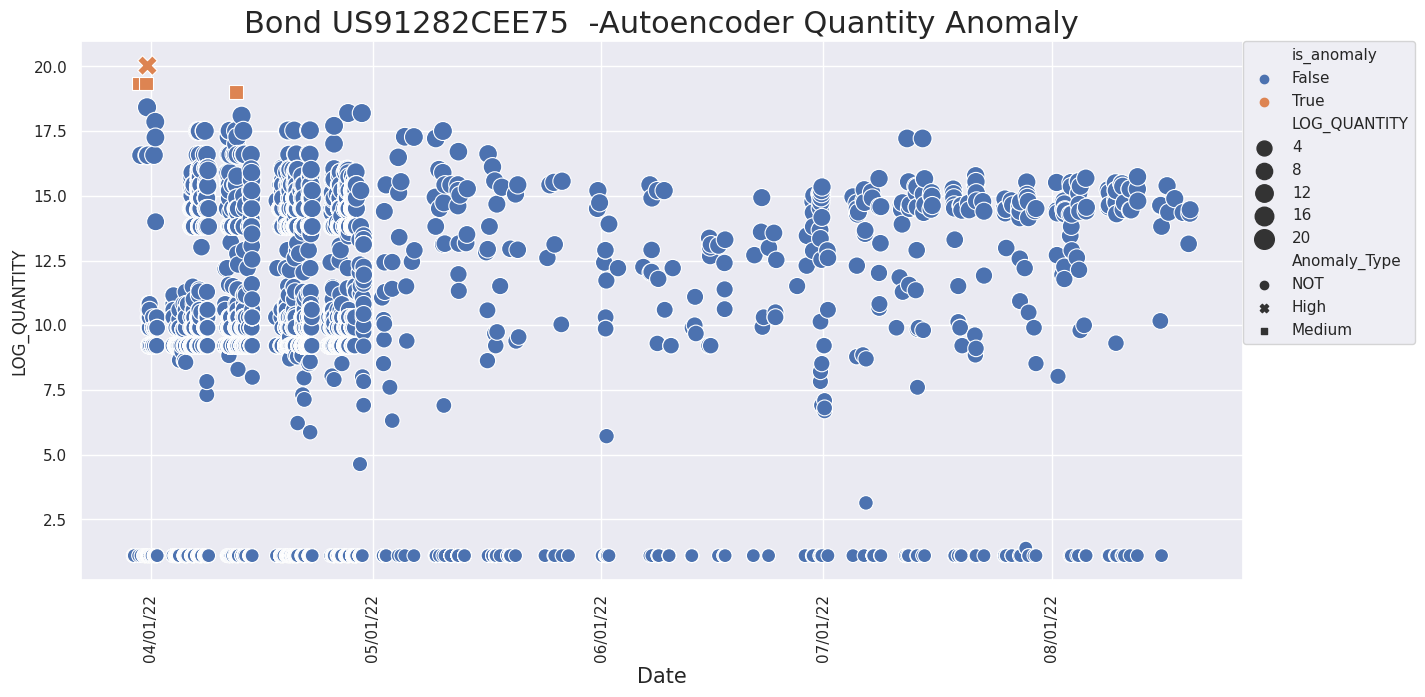

In [22]:
fig, ax = plt.subplots(figsize=(15,7))
#ax.plot(df['date'], df['PRICE'])
plt.xlabel('Date', fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.title('Bond US91282CEE75  -Autoencoder Quantity Anomaly',fontsize=22)
sns.scatterplot(x='date', y='LOG_QUANTITY', data=df, hue='is_anomaly',size='LOG_QUANTITY',style='Anomaly_Type',legend='brief',sizes=(100, 200))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
#p9.ggplot(df, p9.aes(x='date', y='QUANTITY', color='is_anomaly')) + p9.geom_point(size=0.5)

plt.show()

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Text(0.5, 0, 'Log Quantity (Distribution for Bond US91282CEE75) ')

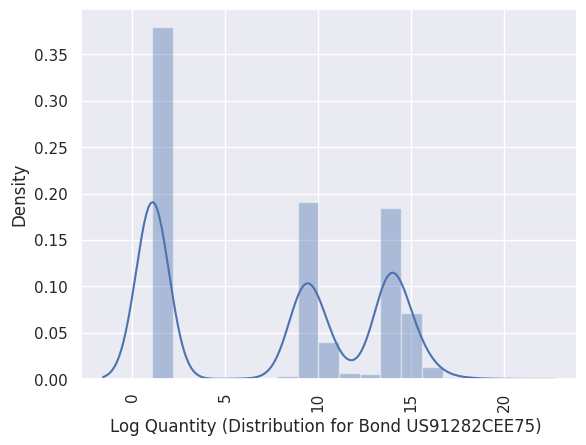

In [23]:
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=90)
sns.distplot(df['LOG_QUANTITY'])
plt.xlabel('Log Quantity (Distribution for Bond US91282CEE75) ', fontsize=12)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Text(0.5, 0, 'Quantity (Distribution for Bond US91282CEE75) ')

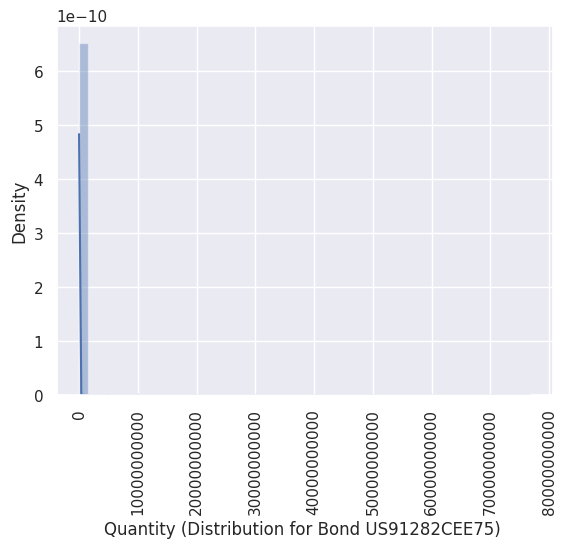

In [43]:
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=90)
sns.distplot(df['QUANTITY'])
plt.xlabel('Quantity (Distribution for Bond US91282CEE75) ', fontsize=12)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Text(0.5, 0, 'Price Difference (Distribution for Bond US91282CEE75) ')

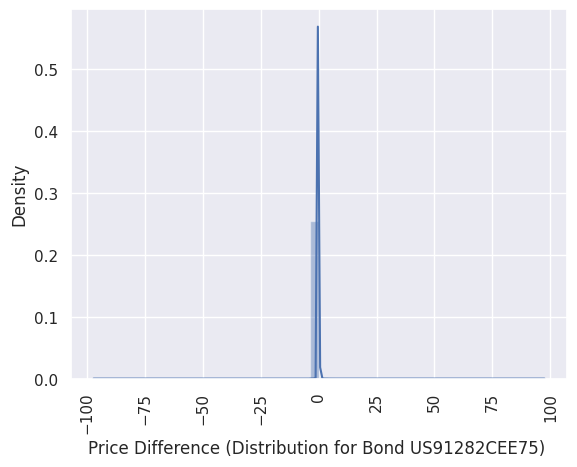

In [24]:
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=90)
sns.distplot(df['PRICE_DIFF'])
plt.xlabel('Price Difference (Distribution for Bond US91282CEE75) ', fontsize=12)

In [25]:

####Visualizations from Time Series Model

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


[Text(0, 0, '2.13364e+06'), Text(0, 0, '25423')]

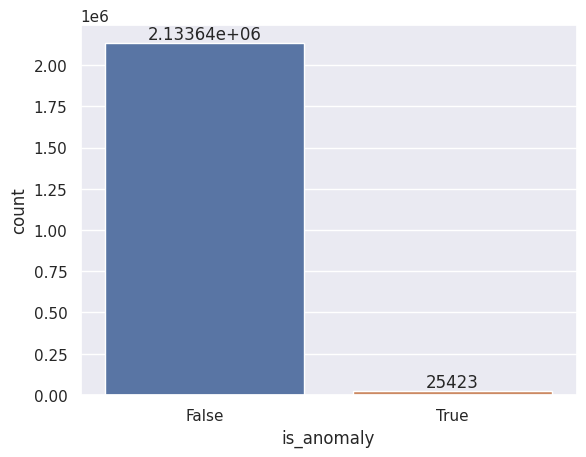

In [26]:
##Training data for price

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotnine as p9
import matplotlib.dates as mdates

# Import data
df = pd.read_csv('liquidbonds_ae.csv')

ax=sns.countplot(df['is_anomaly'])
df = df[(df['POST_TRADE_DATE_AND_TIME'] >= '2022-05-01') & (df['POST_TRADE_DATE_AND_TIME'] <= '2022-06-30')]
df['Anomaly_Type'] = df['Anomaly_Type'].fillna('Not')


ax.bar_label(ax.containers[0])


In [27]:
# Visualize the time series data with  for one bond

df = df[df['INSTRUMENT_IDENTIFICATION_CODE'] == 'GB00BP1W7G45']
df['date'] = pd.to_datetime(df['POST_TRADE_DATE_AND_TIME'])
df = df.sort_values(by='date')

df1=df[df['is_anomaly'] ==True]
df1['date'] = pd.to_datetime(df1['date'])
df1 = df1.sort_values(by='date')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


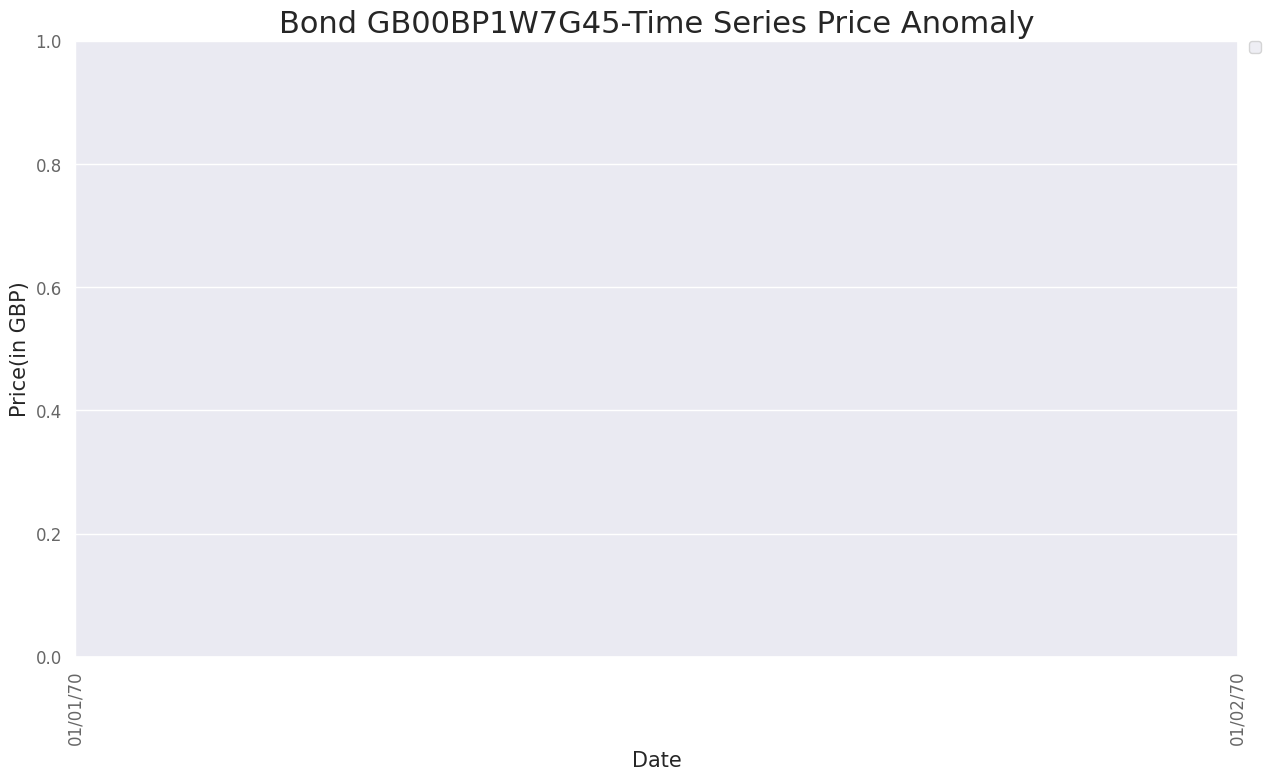

In [28]:
fig, ax = plt.subplots(figsize=(15,8))
#ax.plot(df['date'], df['PRICE'])
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price(in GBP)', fontsize=15)
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(fontsize=12, alpha=.7)
sns.set(style="darkgrid")
#g = sns.relplot(x="date", y="PRICE", kind="line", data=df)
sns.scatterplot(x='date', y='PRICE', data=df, hue='is_anomaly',size='PRICE',style='Anomaly_Type',legend='brief',sizes=(50, 200))
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
#p9.ggplot(df, p9.aes(x='date', y='PRICE', color='is_anomaly')) + p9.geom_point(size=0.5)
plt.title('Bond GB00BP1W7G45-Time Series Price Anomaly',fontsize=22)

plt.show()

In [29]:
##Training data for Quantity

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotnine as p9
import matplotlib.dates as mdates

# Import dat
df = pd.read_csv('liquidbonds_ae.csv')
df = df[(df['POST_TRADE_DATE_AND_TIME'] >= '2022-01-01') & (df['POST_TRADE_DATE_AND_TIME'] <= '2022-06-28')]
df['Anomaly_Type'] = df['Anomaly_Type'].fillna('Not')


In [31]:
# Visualize the time series data with no segment for one bond

df = df[df['INSTRUMENT_IDENTIFICATION_CODE'] == 'GB00BP1W0B05']
df['date'] = pd.to_datetime(df['POST_TRADE_DATE_AND_TIME'])
df = df.sort_values(by='date')

df1=df[df['is_anomaly'] ==True]
df1['date'] = pd.to_datetime(df1['POST_TRADE_DATE_AND_TIME'])
df1 = df1.sort_values(by='date')
df

,is_anomaly,mean_squared_error,TRADING_DATE_AND_TIME,POST_TRADE_DATE_AND_TIME,INSTRUMENT_IDENTIFICATION_CODE,PRICE,VENUE_OF_EXECUTION,PRICE_NOTATION,PRICE_CURRENCY,VENUE_OF_PUBLICATION,TRANSACTION_IDENTIFICATION_CODE,QUANTITY,NOTIONAL_AMOUNT,NOTIONAL_CURRENCY,PUBLICATION_DATE_AND_TIME,IDAF,PRICE_DIFF,LOG_QUANTITY,Anomaly_Type,date


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


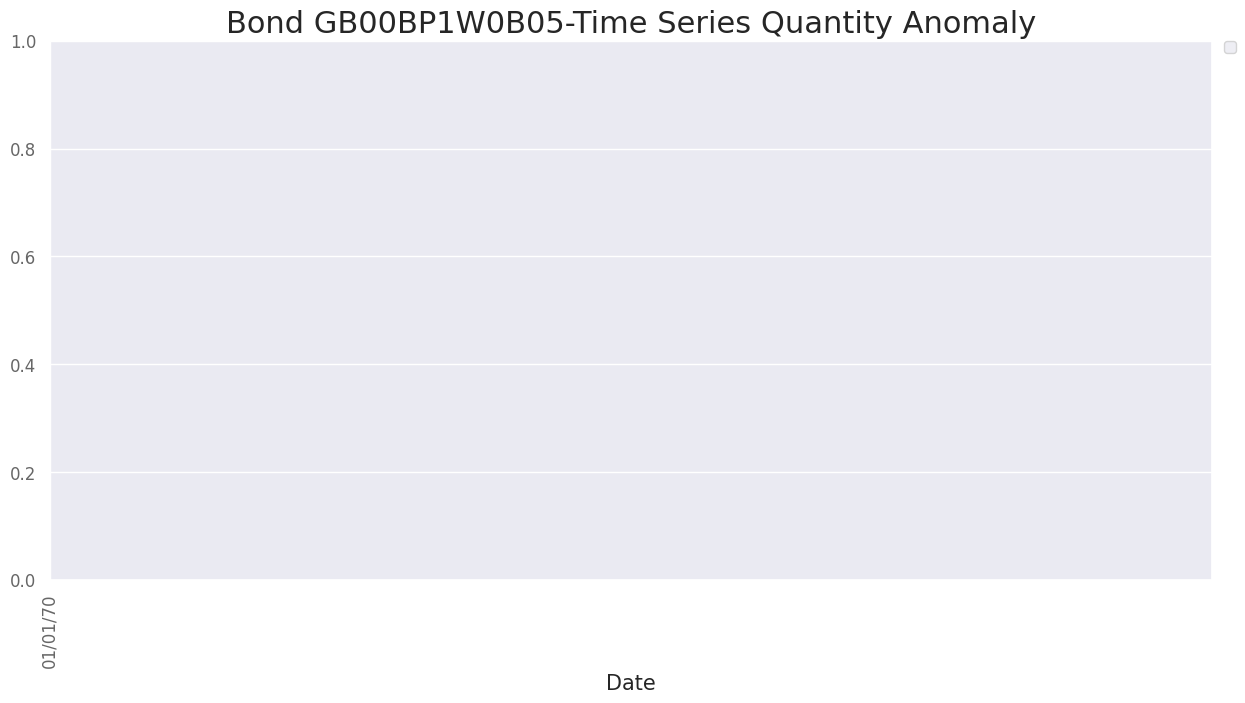

In [32]:
fig, ax = plt.subplots(figsize=(15,7))
#ax.plot(df['date'], df['PRICE'])
plt.xlabel('Date', fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.title('Bond GB00BP1W0B05-Time Series Quantity Anomaly',fontsize=22)
sns.scatterplot(x='date', y='QUANTITY', data=df, hue='is_anomaly',size='QUANTITY' ,style='Anomaly_Type',legend='brief',sizes=(50, 200))
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(fontsize=12, alpha=.7)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
#p9.ggplot(df, p9.aes(x='date', y='QUANTITY', color='is_anomaly')) + p9.geom_point(size=0.5)

plt.show()

In [33]:

####Visualizations from k-means Model

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


[Text(0, 0, '2.13364e+06'), Text(0, 0, '25423')]

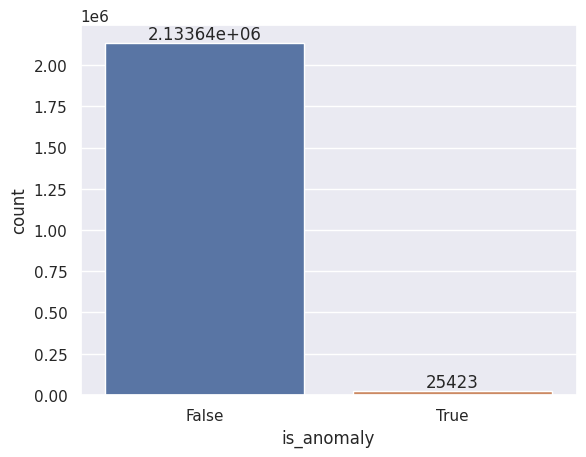

In [34]:
##Training data for price

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotnine as p9
import matplotlib.dates as mdates

# Import data
df = pd.read_csv('liquidbonds_ae.csv')

ax=sns.countplot(df['is_anomaly'])
#df = df[(df['POST_TRADE_DATE_AND_TIME'] >= '2022-05-01') & (df['POST_TRADE_DATE_AND_TIME'] <= '2022-06-30')]
#df['is_anomaly'] = df['is_anomaly'].fillna('Not')


ax.bar_label(ax.containers[0])



In [35]:
# Visualize the k-means data for one bond

df = df[df['INSTRUMENT_IDENTIFICATION_CODE'] == 'GB00BDX8CX86']
df['date'] = pd.to_datetime(df['POST_TRADE_DATE_AND_TIME'])
df = df.sort_values(by='date')

df1=df[df['is_anomaly'] ==True]
df1['date'] = pd.to_datetime(df1['date'])
df1 = df1.sort_values(by='date')




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


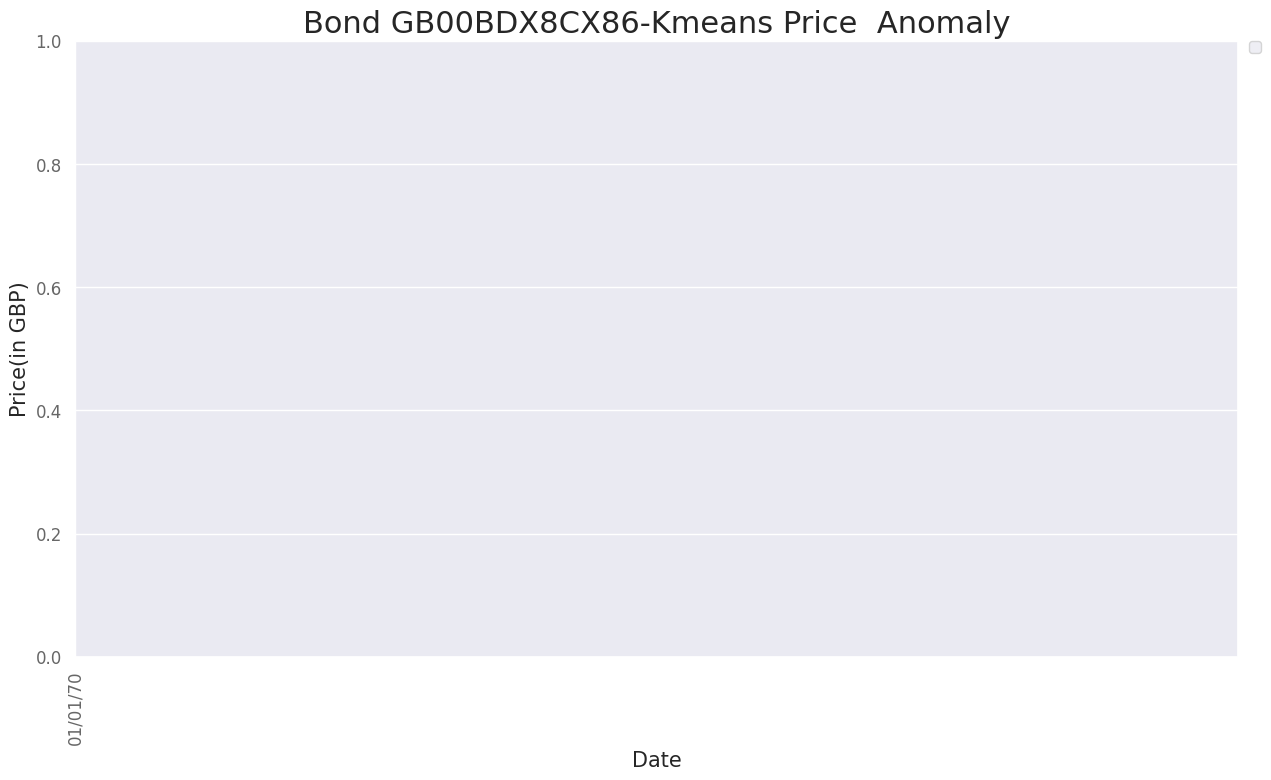

In [36]:
fig, ax = plt.subplots(figsize=(15,8))
#ax.plot(df['date'], df['PRICE'])
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price(in GBP)', fontsize=15)
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(fontsize=12, alpha=.7)
sns.set(style="darkgrid")
#g = sns.relplot(x="date", y="PRICE", kind="line", data=df)
sns.scatterplot(x='date', y='PRICE', data=df, hue='is_anomaly',size='PRICE',legend='brief',sizes=(50, 100))
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
#p9.ggplot(df, p9.aes(x='date', y='PRICE', color='is_anomaly')) + p9.geom_point(size=0.5)
plt.title('Bond GB00BDX8CX86-Kmeans Price  Anomaly',fontsize=22)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


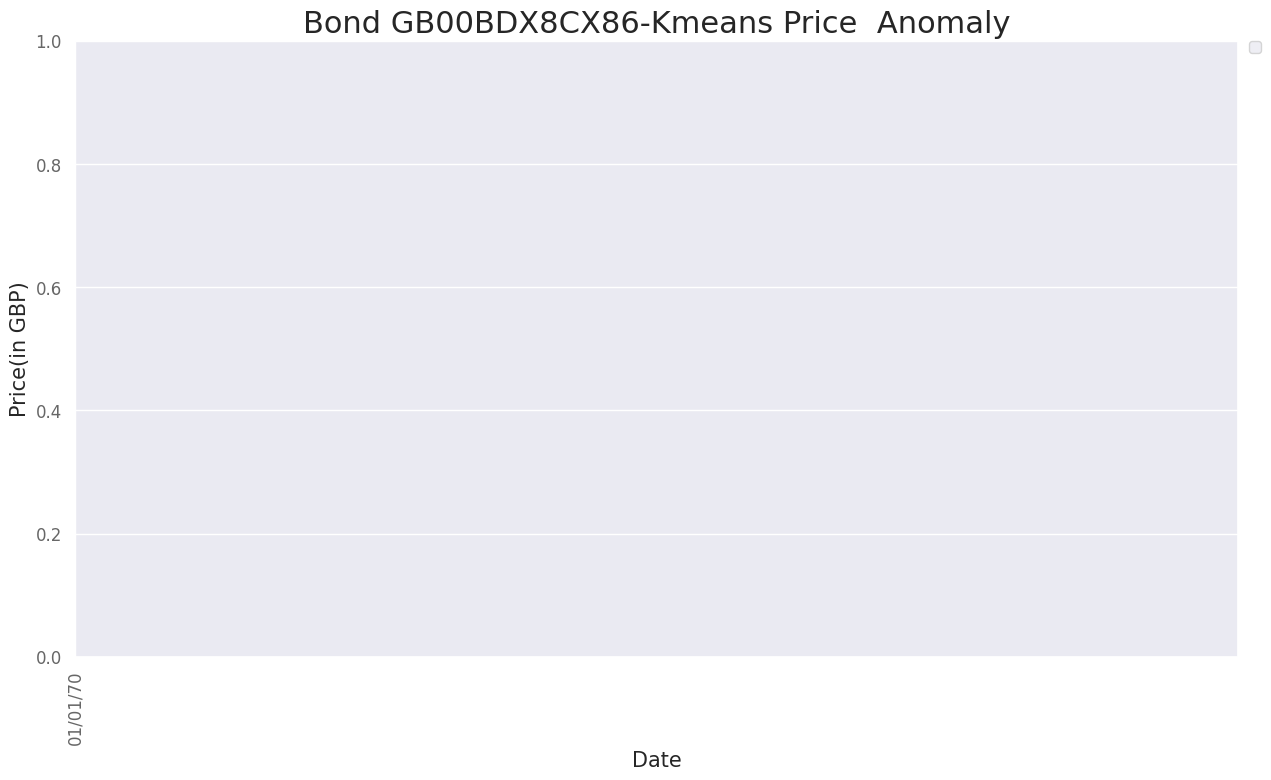

In [37]:
fig, ax = plt.subplots(figsize=(15,8))
#ax.plot(df['date'], df['PRICE'])
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price(in GBP)', fontsize=15)
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(fontsize=12, alpha=.7)
sns.set(style="darkgrid")
#g = sns.relplot(x="date", y="PRICE", kind="line", data=df)
sns.scatterplot(x='date', y='PRICE_DIFF', data=df, hue='is_anomaly',size='PRICE_DIFF',legend='brief',sizes=(50, 200))
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
#p9.ggplot(df, p9.aes(x='date', y='PRICE', color='is_anomaly')) + p9.geom_point(size=0.5)
plt.title('Bond GB00BDX8CX86-Kmeans Price  Anomaly',fontsize=22)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


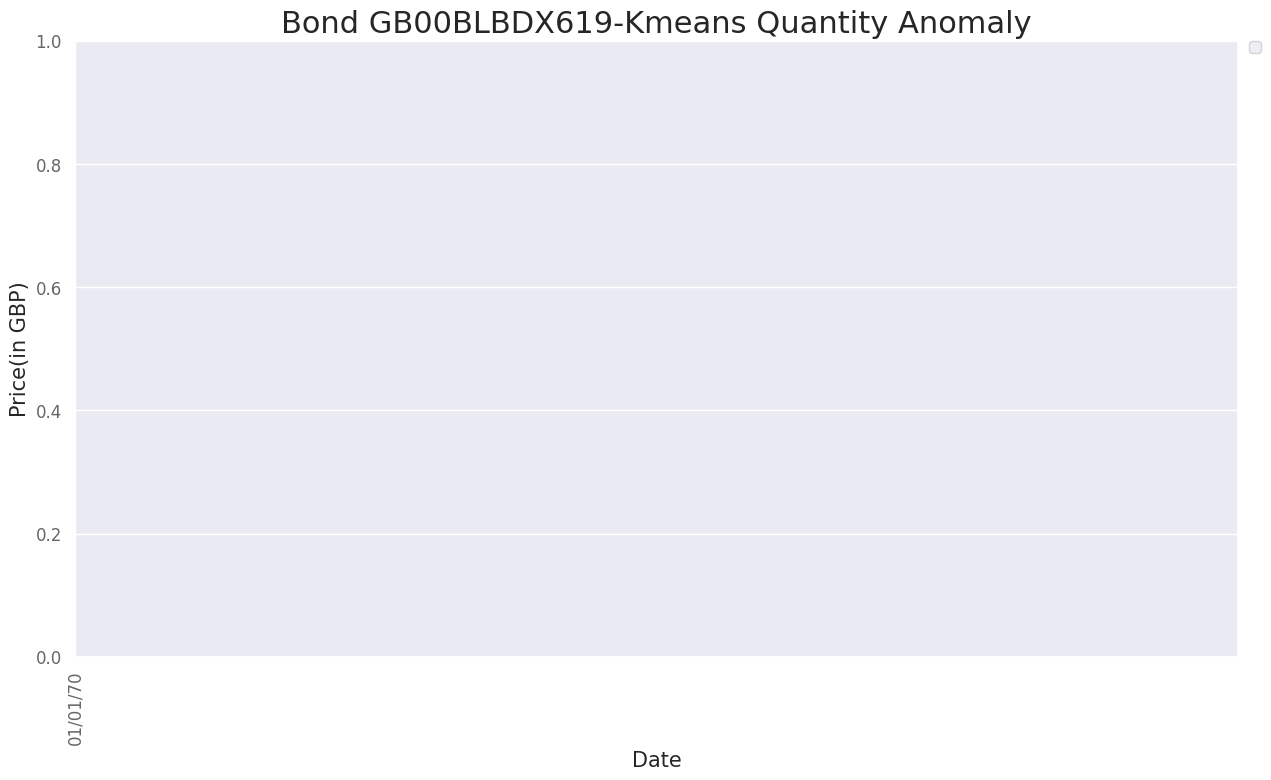

In [38]:
fig, ax = plt.subplots(figsize=(15,8))
#ax.plot(df['date'], df['PRICE'])
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price(in GBP)', fontsize=15)
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(fontsize=12, alpha=.7)
sns.set(style="darkgrid")
#g = sns.relplot(x="date", y="PRICE", kind="line", data=df)
sns.scatterplot(x='date', y='LOG_QUANTITY', data=df, hue='is_anomaly',size='LOG_QUANTITY',legend='brief',sizes=(50, 200))
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
#p9.ggplot(df, p9.aes(x='date', y='PRICE', color='is_anomaly')) + p9.geom_point(size=0.5)
plt.title('Bond GB00BLBDX619-Kmeans Quantity Anomaly',fontsize=22)

plt.show()

In [39]:
#GB00BYMWG366

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


[Text(0, 0, '2.13364e+06'), Text(0, 0, '25423')]

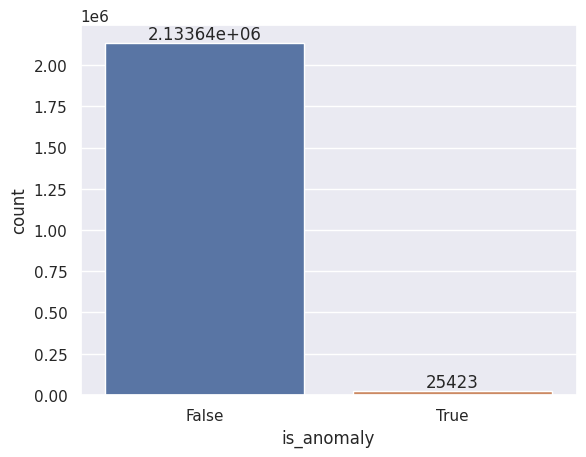

In [40]:
##Training data for price

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotnine as p9
import matplotlib.dates as mdates

# Import data
df = pd.read_csv('liquidbonds_ae.csv')

ax=sns.countplot(df['is_anomaly'])
#df = df[(df['POST_TRADE_DATE_AND_TIME'] >= '2022-05-01') & (df['POST_TRADE_DATE_AND_TIME'] <= '2022-06-30')]
#df['is_anomaly'] = df['is_anomaly'].fillna('Not')


ax.bar_label(ax.containers[0])



KeyError: 'CENTROID_ID'

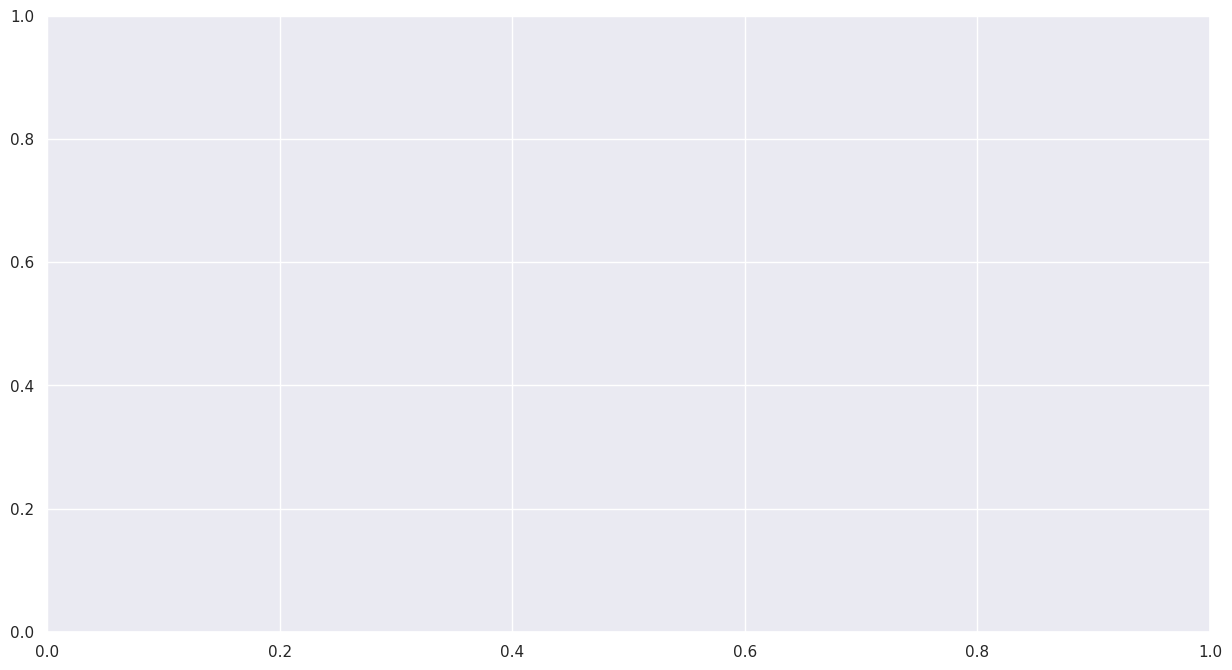

In [41]:
#Centroid Visualization
df2= df.loc[df['INSTRUMENT_IDENTIFICATION_CODE'].isin(['GB00BYY5F144','GB00BL68HH02','GB0008932666','GB0031790826','GB00BL68HG94','GB00BDX8CX86'])]
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=df2['CENTROID_ID'],y=df2['PRICE'],data=df2,hue=df2['INSTRUMENT_IDENTIFICATION_CODE'],style=df2['is_anomaly'],sizes=(100, 400))
plt.xticks(np.arange(0, 85, step=2))
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(fontsize=12, alpha=.7)
plt.title('Price Visualization around centroid for 6 bonds',fontsize=22)
plt.show()

In [ ]:
df2= df.loc[df['INSTRUMENT_IDENTIFICATION_CODE'].isin(['GB00BYY5F144','GB00BL68HH02','GB0008932666','GB0031790826','GB00BL68HG94','GB00BDX8CX86'])]
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(df2['CENTROID_ID'],df2['QUANTITY'],hue=df2['INSTRUMENT_IDENTIFICATION_CODE'],style=df2['is_anomaly'],legend='brief',sizes=(200, 400))
plt.xticks(np.arange(0, 85, step=2))
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(fontsize=12, alpha=.7)
plt.title('Quantity Visualization around centroid for 6 bonds',fontsize=22)
plt.show()

In [ ]:

df = df[df['INSTRUMENT_IDENTIFICATION_CODE'] == 'GB00BYMWG366']
df['date'] = pd.to_datetime(df['POST_TRADE_DATE_AND_TIME'])
df = df.sort_values(by='date')

df1=df[df['is_anomaly'] ==True]
df1['date'] = pd.to_datetime(df1['date'])
df1 = df1.sort_values(by='date')


In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
#ax.plot(df['date'], df['PRICE'])
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price(in GBP)', fontsize=15)
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(fontsize=12, alpha=.7)
sns.set(style="darkgrid")
#g = sns.relplot(x="date", y="PRICE", kind="line", data=df)
sns.scatterplot(x='date', y='PRICE_DIFF', data=df, hue='is_anomaly',size='PRICE_DIFF',legend='brief',sizes=(50, 200))
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
#p9.ggplot(df, p9.aes(x='date', y='PRICE', color='is_anomaly')) + p9.geom_point(size=0.5)
plt.title('Bond GB00BYMWG366-Kmeans Price Anomaly',fontsize=22)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
#ax.plot(df['date'], df['PRICE'])
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Quanity', fontsize=15)
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(fontsize=12, alpha=.7)
sns.set(style="darkgrid")
#g = sns.relplot(x="date", y="PRICE", kind="line", data=df)
sns.scatterplot(x='date', y='QUANTITY', data=df, hue='is_anomaly',size='QUANTITY',legend='brief',sizes=(50, 200))
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
#p9.ggplot(df, p9.aes(x='date', y='PRICE', color='is_anomaly')) + p9.geom_point(size=0.5)
plt.title('Bond GB00BLBDX619-Kmeans Quantity Anomaly',fontsize=22)

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load the data
df2 = pd.read_csv('liquidbonds_ae.csv')
df = pd.read_csv('liquidbonds_ae.csv', parse_dates=['POST_TRADE_DATE_AND_TIME'])
df2= df.loc[df['INSTRUMENT_IDENTIFICATION_CODE'].isin(['GB00BYY5F144','GB00BLBDX619','GB0008932666','GB0031790826','GB00BL68HG94','GB00BDX8CX86'])]
fig, ax = plt.subplots(figsize=(15,8))

sns.lineplot(x=df['POST_TRADE_DATE_AND_TIME'],y=df2['PRICE'],data=df2,hue=df2['INSTRUMENT_IDENTIFICATION_CODE'],legend='brief')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
df = df[df['INSTRUMENT_IDENTIFICATION_CODE'] == 'GB00BLBDX619']



# Plot

fig, axes = plt.subplots(2, 1, figsize=(15, 8), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(df.PRICE.diff(1)); axes[0].set_title('Usual Differencing')
axes[0].grid(True)

# Seasonal Differencing
axes[1].plot(df.PRICE.diff(12)); axes[1].set_title('Seasonal Differencing')
axes[1].grid(True)

plt.show()

# ADF Test on the Original Series
result = adfuller(df.PRICE.dropna())
print('Augmented Dickey-Fuller Test on the Original Series')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

# ADF Test on the Seasonally Adjusted Series
result = adfuller(df.PRICE.diff(12).dropna())
print('Augmented Dickey-Fuller Test on the Seasonally Adjusted Series')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

#Load a stock price data set
df = pd.read_csv('liquidbonds_ae.csv',parse_dates=['POST_TRADE_DATE_AND_TIME'])
#df.set_index('POST_TRADE_DATE_AND_TIME', inplace=True)

df = df[df['INSTRUMENT_IDENTIFICATION_CODE'] == 'GB00BDX8CX86']

#Identify if the data is stationary
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    fig, ax = plt.subplots(figsize=(15,8))
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation for bond GB00BDX8CX86')
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(df['PRICE'])

#Apply the differencing on price column
df['PRICE_DIFF'] = df['PRICE'] - df['PRICE'].shift(1)
df.head()

#Check if it is now stationary
test_stationarity(df['PRICE_DIFF'].dropna())

In [ ]:
df

In [ ]:
sns.distplot(df['PRICE'])

In [ ]:
sns.distplot(df['PRICE_DIFF'])

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load the data
df2 = pd.read_csv('liquidbonds_ae.csv')
df = pd.read_csv('liquidbonds_ae.csv', parse_dates=['POST_TRADE_DATE_AND_TIME'])
df2= df.loc[df['INSTRUMENT_IDENTIFICATION_CODE'].isin(['GB00BYY5F144','GB00BL68HH02','GB0008932666','GB0031790826','GB00BL68HG94','GB00BDX8CX86'])]
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(x=df['POST_TRADE_DATE_AND_TIME'],y=df2['QUANTITY'],data=df2,hue=df2['INSTRUMENT_IDENTIFICATION_CODE'],legend='brief')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load the data
df2 = pd.read_csv('liquidbonds_ae.csv')
df = pd.read_csv('liquidbonds_ae.csv', parse_dates=['POST_TRADE_DATE_AND_TIME'])
df2= df.loc[df['INSTRUMENT_IDENTIFICATION_CODE'].isin(['GB00BYY5F144','GB00BL68HH02','GB0008932666','GB0031790826','GB00BL68HG94','GB00BDX8CX86'])]
fig, ax = plt.subplots(figsize=(15,8))
df2['LOG_QUANTITY'] = np.log(df2['QUANTITY'])
df.head()

sns.lineplot(x=df['POST_TRADE_DATE_AND_TIME'],y=df2['LOG_QUANTITY'],data=df2,hue=df2['INSTRUMENT_IDENTIFICATION_CODE'],legend='brief')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)


In [ ]:
#df['centroid'] = df.groupby('cluster')['cluster'].transform('count')

# Create price column
#df['price'] = df['price'].astype(float)

# Create quantity column
#df['quantity'] = df['quantity'].astype(float)

# Visualize price data around the centroid data


In [ ]:
#Visualize the centroids

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Create a dataframe
df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})

# Create a pie chart
plt.pie(df['val'], labels=df['lab'], autopct='%1.1f%%')
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame({'A': ['a', 'a', 'b', 'b', 'a', 'b', 'a', 'b', 'a', 'b'],
                   'B': ['c', 'd', 'c', 'd', 'c', 'd', 'c', 'd', 'c', 'd']})

sns.countplot(x='A', data=df)

In [ ]:
##Autoencoders extended

In [ ]:
## Auto Encoder Data   1st Bond selected GB0004893086

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotnine as p9
import matplotlib.dates as mdates

# Import data
df = pd.read_csv('autoencoders_results_t.csv')
ax=sns.countplot(df['is_anomaly'])

#df = df[(df['POST_TRADE_DATE_AND_TIME'] >= '2022-01-01') & (df['POST_TRADE_DATE_AND_TIME'] <= '2022-02-28')]



ax.bar_label(ax.containers[0])
df['Anomaly_Type'] = df['Anomaly_Type'].fillna('Not')

In [ ]:
# Visualize the autoencoders data with no segment for one bond

df = df[df['INSTRUMENT_IDENTIFICATION_CODE'] == 'GB0004893086']
df['date'] = pd.to_datetime(df['POST_TRADE_DATE_AND_TIME'])
df = df.sort_values(by='POST_TRADE_DATE_AND_TIME')

df1=df[df['is_anomaly'] ==True]
df1['date'] = pd.to_datetime(df1['POST_TRADE_DATE_AND_TIME'])
df1 = df1.sort_values(by='POST_TRADE_DATE_AND_TIME')

#df1
#print(df.tail())

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
#ax.plot(df['date'], df['PRICE'])
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price(in GBP)', fontsize=15)
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(fontsize=12, alpha=.7)
sns.set(style="darkgrid")
#g = sns.relplot(x="date", y="PRICE", kind="line", data=df4
sns.scatterplot(x='date', y='PRICE', data=df, hue='is_anomaly',size='PRICE',style='Anomaly_Type',legend='brief',sizes=(50, 100))
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
#p9.ggplot(df, p9.aes(x='date', y='PRICE', color='is_anomaly')) + p9.geom_point(size=0.5)
plt.title('Bond GB0004893086 -Autoencoder Price Anomaly',fontsize=22)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
#ax.plot(df['date'], df['PRICE'])
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date', fontsize=15)
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(fontsize=12, alpha=.7)
#sns.set(style="whitegrid")
plt.title('Bond GB0004893086 -Autoencoder Quantity Anomaly',fontsize=22)
sns.set(style="darkgrid")
sns.scatterplot(x='date', y='LOG_QUANTITY', data=df, hue='is_anomaly',size='QUANTITY',style='Anomaly_Type',legend='brief',sizes=(50, 100))
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

plt.show()


In [ ]:
#sns.distplot(df['QUANTITY'])
plt.ticklabel_format(style='plain', axis='y')
df.boxplot(column='LOG_QUANTITY')

In [ ]:
#sns.distplot(df['QUANTITY'])
plt.ticklabel_format(style='plain', axis='y')
df.boxplot(column='PRICE')

In [ ]:
##Visualization of the quantity distribution
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=90)
sns.distplot(df['LOG_QUANTITY'])
plt.xlabel('Quantity (Distribution for Bond GB0004893086) ', fontsize=12)

In [ ]:
sns.distplot(df['PRICE_DIFF'])
plt.xlabel('PRICE (Distribution for Bond GB0004893086) ', fontsize=12)

In [ ]:
## 2nd Bond Selected ## Auto Encoder Data   Bond selected GB0008932666

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.dates as mdates

# Import data
df = pd.read_csv('eubonds_ae.csv')
#df = df[(df['POST_TRADE_DATE_AND_TIME'] >= '2022-02-01') & (df['POST_TRADE_DATE_AND_TIME'] <= '2022-03-31')]
df['Anomaly_Type'] = df['Anomaly_Type'].fillna('Not')

In [ ]:
# Visualize the data with  for one bond

df = df[df['INSTRUMENT_IDENTIFICATION_CODE'] == 'GB00BMGR2809'] ##GB0008932666  GB00B00NY175
df['date'] = pd.to_datetime(df['POST_TRADE_DATE_AND_TIME'])
df = df.sort_values(by='POST_TRADE_DATE_AND_TIME')

df1=df[df['is_anomaly'] ==True]
df1['date'] = pd.to_datetime(df1['POST_TRADE_DATE_AND_TIME'])
df1 = df1.sort_values(by='POST_TRADE_DATE_AND_TIME')


In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
#ax.plot(df['date'], df['PRICE'])
plt.xlabel('Date', fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.title('Bond GB00BMGR2809  -Autoencoder Quantity Anomaly',fontsize=22)
sns.scatterplot(x='date', y='LOG_QUANTITY', data=df, hue='is_anomaly',size='LOG_QUANTITY',style='Anomaly_Type',legend='brief',sizes=(100, 200))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
#p9.ggplot(df, p9.aes(x='date', y='QUANTITY', color='is_anomaly')) + p9.geom_point(size=0.5)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
#ax.plot(df['date'], df['PRICE'])
plt.xlabel('Date', fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.title('Bond GB00BMGR2809 -Autoencoder Price Anomaly',fontsize=22)
sns.scatterplot(x='date', y='PRICE', data=df, hue='is_anomaly',size='PRICE',style='Anomaly_Type',legend='brief',sizes=(50, 100))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#p9.ggplot(df, p9.aes(x='date', y='QUANTITY', color='is_anomaly')) + p9.geom_point(size=0.5)

plt.show()